<a href="https://colab.research.google.com/github/SANGRAMLEMBE/MTech/blob/main/Applied_Data_Science/Practical/ADS_LAB_10%2C11%2C12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series, Advanced Pandas and Numpy - LAB 10, 11 & 12

## Lab 10 : Time series


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')



In [2]:
# -------------------------------
# 1. Parse & Index
# -------------------------------

# Read dataset
df = pd.read_csv("/content/daily-min-temperatures.csv", parse_dates=['Date'], dayfirst=True)

# Set datetime index
df = df.set_index('Date')

# Show first 10 rows
print("\nFirst 10 rows:")
print(df.head(10))

# Check inferred frequency
print("\nDatetime index frequency:")
print(pd.infer_freq(df.index))




First 10 rows:
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
1981-01-06  15.8
1981-01-07  15.8
1981-01-08  17.4
1981-01-09  21.8
1981-01-10  20.0

Datetime index frequency:
None


In [3]:
# -------------------------------
# 2. Generate Synthetic One-Month Data
# -------------------------------

synthetic_dates = pd.date_range('01-01-1991', '01-31-31', freq='D')

# Generate synthetic temperatures (for demo purposes)
np.random.seed(42)
synthetic_temps = np.random.normal(loc=15, scale=5, size=len(synthetic_dates))

# Create a DataFrame for synthetic data
df_synth = pd.DataFrame({'Temp': synthetic_temps}, index=synthetic_dates)

# Combine (align by reindex)
df_combined = pd.concat([df, df_synth])

print("\nSynthetic data added (sample):")
print(df_combined.tail(10))




Synthetic data added (sample):
                 Temp
2031-01-22   9.041404
2031-01-23  13.957468
2031-01-24  12.341121
2031-01-25  17.981499
2031-01-26  14.743025
2031-01-27  18.138512
2031-01-28  13.544893
2031-01-29  11.674463
2031-01-30  12.082197
2031-01-31  25.224694


In [4]:
# -------------------------------
# 3. Shifts & Lags
# -------------------------------

df_combined['Temp_shift_plus2'] = df_combined['Temp'].shift(2)
df_combined['Temp_shift_minus2'] = df_combined['Temp'].shift(-2)
df_combined['Temp_diff_vs_minus2'] = df_combined['Temp'] - df_combined['Temp_shift_minus2']

print("\nSample with shifted values:")
print(df_combined[['Temp', 'Temp_shift_plus2', 'Temp_shift_minus2', 'Temp_diff_vs_minus2']].head(8))




Sample with shifted values:
            Temp  Temp_shift_plus2  Temp_shift_minus2  Temp_diff_vs_minus2
1981-01-01  20.7               NaN               18.8                  1.9
1981-01-02  17.9               NaN               14.6                  3.3
1981-01-03  18.8              20.7               15.8                  3.0
1981-01-04  14.6              17.9               15.8                 -1.2
1981-01-05  15.8              18.8               15.8                  0.0
1981-01-06  15.8              14.6               17.4                 -1.6
1981-01-07  15.8              15.8               21.8                 -6.0
1981-01-08  17.4              15.8               20.0                 -2.6


In [5]:
# -------------------------------
# 4. Resampling
# -------------------------------

# Weekly mean temperature
weekly_mean = df_combined['Temp'].resample('W').mean()

# Quarterly count of valid temperature readings
quarterly_count = df_combined['Temp'].resample('Q').count()

print("\nWeekly mean temperature sample:")
print(weekly_mean.head())

print("\nQuarterly count sample:")
print(quarterly_count.head())




Weekly mean temperature sample:
1981-01-04    18.000000
1981-01-11    17.542857
1981-01-18    20.371429
1981-01-25    15.771429
1981-02-01    16.657143
Freq: W-SUN, Name: Temp, dtype: float64

Quarterly count sample:
1981-03-31    90
1981-06-30    91
1981-09-30    92
1981-12-31    92
1982-03-31    90
Freq: QE-DEC, Name: Temp, dtype: int64


In [6]:
# -------------------------------
# 5. Time Zone Awareness
# -------------------------------

# Localize as UTC
df_tz = df_combined.tz_localize('UTC')

# Convert to Australia/Melbourne and Asia/Kolkata
df_melb = df_tz.tz_convert('Australia/Melbourne')
df_kolk = df_tz.tz_convert('Asia/Kolkata')

print("\nTime zone conversion samples:")
print("UTC:", df_tz.index[0])
print("Melbourne:", df_melb.index[0])
print("Kolkata:", df_kolk.index[0])




Time zone conversion samples:
UTC: 1981-01-01 00:00:00+00:00
Melbourne: 1981-01-01 11:00:00+11:00
Kolkata: 1981-01-01 05:30:00+05:30



Rolling mean sample:
            Temp  Temp_7d_roll_mean
1981-01-01  20.7                NaN
1981-01-02  17.9                NaN
1981-01-03  18.8                NaN
1981-01-04  14.6                NaN
1981-01-05  15.8                NaN
1981-01-06  15.8                NaN
1981-01-07  15.8          17.057143
1981-01-08  17.4          16.585714
1981-01-09  21.8          17.142857
1981-01-10  20.0          17.314286


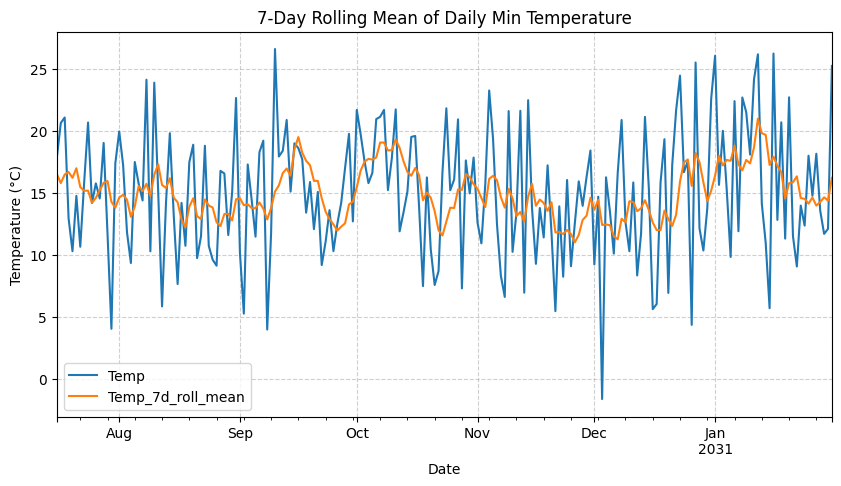

In [7]:
# -------------------------------
# 6. Rolling Windows
# -------------------------------

df_combined['Temp_7d_roll_mean'] = df_combined['Temp'].rolling(7).mean()

print("\nRolling mean sample:")
print(df_combined[['Temp', 'Temp_7d_roll_mean']].head(10))

# Plot rolling mean
df_combined[['Temp', 'Temp_7d_roll_mean']].tail(200).plot(figsize=(10,5))
plt.title("7-Day Rolling Mean of Daily Min Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [8]:
# -------------------------------
# 7. PeriodIndex & Frequency Conversion
# -------------------------------

# Convert to monthly PeriodIndex
df_period = df_combined.copy()
df_period.index = df_period.index.to_period('M')

# Aggregate monthly average temperature
monthly_avg = df_period['Temp'].groupby(df_period.index).mean()

print("\nMonthly average temperature (PeriodIndex):")
print(monthly_avg.head())

# Demonstrate addition/subtraction of periods
sample_period = monthly_avg.index[0]
print("\nSample Period manipulation:")
print("Current period:", sample_period)
print("3 months later:", sample_period + 3)
print("2 months earlier:", sample_period - 2)


Monthly average temperature (PeriodIndex):
1981-01    17.712903
1981-02    17.678571
1981-03    13.500000
1981-04    12.356667
1981-05     9.490323
Freq: M, Name: Temp, dtype: float64

Sample Period manipulation:
Current period: 1981-01
3 months later: 1981-04
2 months earlier: 1980-11


Lab 11 — Advanced Pandas GroupBy

In [9]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/employee_salaries.csv")
print("Initial Data:")

def dis(disp):
    return display(round(disp, 2))

dis(disp=df.head())

# -----------------------------------------------
# 1. Basic Grouping with Experience Bins
# -----------------------------------------------

# Define experience bins and labels
bins = [0, 2, 5, np.inf]
labels = ['0-2', '3-5', '6+']

df['Experience_Bin'] = pd.cut(df['Experience_Years'], bins=bins, labels=labels, right=True)

# Group by Gender and Experience Bin
grouped = df.groupby(['Gender', 'Experience_Bin']).agg(
    Mean_Salary=('Salary', 'mean'),
    Median_Salary=('Salary', 'median'),
    Employee_Count=('ID', 'count')
).reset_index()

print("\n1. Mean, Median, and Count of Employees by Gender & Experience Range:")
dis(grouped)

# -----------------------------------------------
# 2. Multiple Aggregations
# -----------------------------------------------
multi_agg = df.groupby('Gender').agg(
    Salary_Mean=('Salary', 'mean'),
    Salary_Min=('Salary', 'min'),
    Salary_Max=('Salary', 'max'),
    Salary_Std=('Salary', 'std'),
    Exp_Mean=('Experience_Years', 'mean'),
    Exp_Median=('Experience_Years', 'median')
).reset_index()

print("\n2. Multiple Aggregations Summary:")
dis(multi_agg)

# -----------------------------------------------
# 3. Categorical Grouping with Ordered Categories
# -----------------------------------------------

# Ensure ordered categorical type
exp_cat = pd.Categorical(df['Experience_Bin'], categories=['0-2', '3-5', '6+'], ordered=True)
df['Experience_Bin'] = exp_cat

avg_salary_by_exp = df.groupby('Experience_Bin')['Salary'].mean().reset_index(name='Avg_Salary')

print("\n3. Average Salary by Ordered Experience Group:")
dis(avg_salary_by_exp)

# -----------------------------------------------
# 4. Hierarchical Grouping and Specific Group
# -----------------------------------------------

# Perform hierarchical groupby
hier_group = df.groupby(['Gender', 'Experience_Bin'])
print("\n4. Group Sizes:")
print(hier_group.size())

# Retrieve one specific group
specific_group = hier_group.get_group(('Male', '3-5'))
print("\nSpecific Group ('Male', '3-5'):")
dis(specific_group)

# -----------------------------------------------
# 5. Method Chaining Example
# -----------------------------------------------

final_table = (
    df[df['Experience_Years'] > 2]           # 1. Filter
    .groupby('Gender')['Salary']             # 2. Group by Gender
    .mean()                                  # 3. Mean Salary
    .sort_values(ascending=False)            # 4. Sort descending
    .reset_index(name='Mean_Salary')         # 5. Reset index
)

print("\n5. Method Chaining Result:")
dis(final_table)


Initial Data:


,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000



1. Mean, Median, and Count of Employees by Gender & Experience Range:


,Gender,Experience_Bin,Mean_Salary,Median_Salary,Employee_Count
0,Female,0-2,7033.33,6100.0,3
1,Female,3-5,130983.33,128500.0,6
2,Female,6+,4020166.67,1540000.0,9
3,Male,0-2,18416.67,12500.0,6
4,Male,3-5,3435000.00,3435000.0,2
5,Male,6+,3122350.00,1400000.0,9



2. Multiple Aggregations Summary:


,Gender,Salary_Mean,Salary_Min,Salary_Max,Salary_Std,Exp_Mean,Exp_Median
0,Female,2054916.67,6000,10000000,3450120.2,10.11,7.5
1,Male,2063626.47,3000,7600000,2950974.3,8.24,6.0



3. Average Salary by Ordered Experience Group:


,Experience_Bin,Avg_Salary
0,0-2,14622.22
1,3-5,956987.50
2,6+,3571258.33



4. Group Sizes:
Gender  Experience_Bin
Female  0-2               3
        3-5               6
        6+                9
Male    0-2               6
        3-5               2
        6+                9
dtype: int64

Specific Group ('Male', '3-5'):


,ID,Experience_Years,Age,Gender,Salary,Experience_Bin
21,22,4,26,Male,25000,3-5
22,23,5,29,Male,6845000,3-5



5. Method Chaining Result:


,Gender,Mean_Salary
0,Male,3179195.45
1,Female,2464493.33


Lab 12 — Advanced NumPy Array Manipulation

In [12]:
import numpy as np
import pandas as pd

# -------------------------------------------
# Step 1 — Load dataset
# -------------------------------------------
df = pd.read_csv("/content/students_performance.csv")
print("Initial Data:")
display(df.head())

def dis(disp):
    return pd.DataFrame(disp).to_string(index=False, header=False)

# Extract score columns
math = df['math score'].to_numpy()
reading = df['reading score'].to_numpy()
writing = df['writing score'].to_numpy()

# -------------------------------------------
# 1. Build numeric arrays & broadcasting
# -------------------------------------------

# Create 2D array (n x 3)
scores = np.array([math, reading, writing]).T
print("\nOriginal Scores Shape:", scores.shape)

# Bonus points array
bonus = np.array([5, 3, 2])

# Broadcasting addition
scores_with_bonus = scores + bonus
print(f"\nScores with bonus (first 5 rows):\n{dis(scores_with_bonus[:5])}")

# -------------------------------------------
# 2. Advanced slicing & fancy indexing
# -------------------------------------------

# Get indices of top 10 students by math score
top10_idx = np.argsort(math)[-10:][::-1]  # descending order

# Extract their reading & writing scores
top10_read_write = scores[top10_idx, 1:3]
print(f"\nTop 10 students' reading & writing scores:\n{dis(top10_read_write)}")

# -------------------------------------------
# 3. Structured array & sorting
# -------------------------------------------

# Compute total scores
total_scores = math + reading + writing

# Create structured array (using race/ethnicity as "name")
structured_dtype = [('group', 'U20'), ('age', 'i4'), ('total', 'f4')]
structured_array = np.array(
    list(zip(df['race/ethnicity'], np.arange(len(df)), total_scores)),
    dtype=structured_dtype
)

# Sort by total descending
structured_sorted = np.sort(structured_array, order='total')[::-1]
print(f"\nTop 5 (sorted by total descending):\n{dis(structured_sorted[:5])}")

# -------------------------------------------
# 4. Record array attribute access
# -------------------------------------------

record_arr = np.rec.fromrecords(structured_sorted, names='group,age,total')
print("\nRecord Array Example Access:")
print(f"Groups:\n{dis(record_arr.group[:5])}")
print(f"Totals:\n{dis(record_arr.total[:5])}")

# -------------------------------------------
# 5. Stacking & splitting
# -------------------------------------------

# Separate arrays
math_arr = math.reshape(-1, 1)
reading_arr = reading.reshape(-1, 1)
writing_arr = writing.reshape(-1, 1)

# Horizontal stack (combine columns)
stacked = np.hstack([math_arr, reading_arr, writing_arr])
print("\nStacked shape:", stacked.shape)

# Split vertically into top 50% and bottom 50%
split_arrays = np.vsplit(stacked, 2)
top_half, bottom_half = split_arrays[0], split_arrays[1]

print("\nTop half shape:", top_half.shape)
print("Bottom half shape:", bottom_half.shape)

Initial Data:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Original Scores Shape: (1000, 3)

Scores with bonus (first 5 rows):
77 75 76
74 93 90
95 98 95
52 60 46
81 81 77

Top 10 students' reading & writing scores:
100 100
100 100
100 100
 97  99
 96  86
 92  97
100  93
 87  81
100 100
 93  90

Top 5 (sorted by total descending):
group E 962 300.0
group E 916 300.0
group E 458 300.0
group E 114 299.0
group D 712 297.0

Record Array Example Access:
Groups:
group E
    962
  300.0
Totals:
group E
    458
  300.0

Stacked shape: (1000, 3)

Top half shape: (500, 3)
Bottom half shape: (500, 3)
